## Flights Dataset Complete EDA

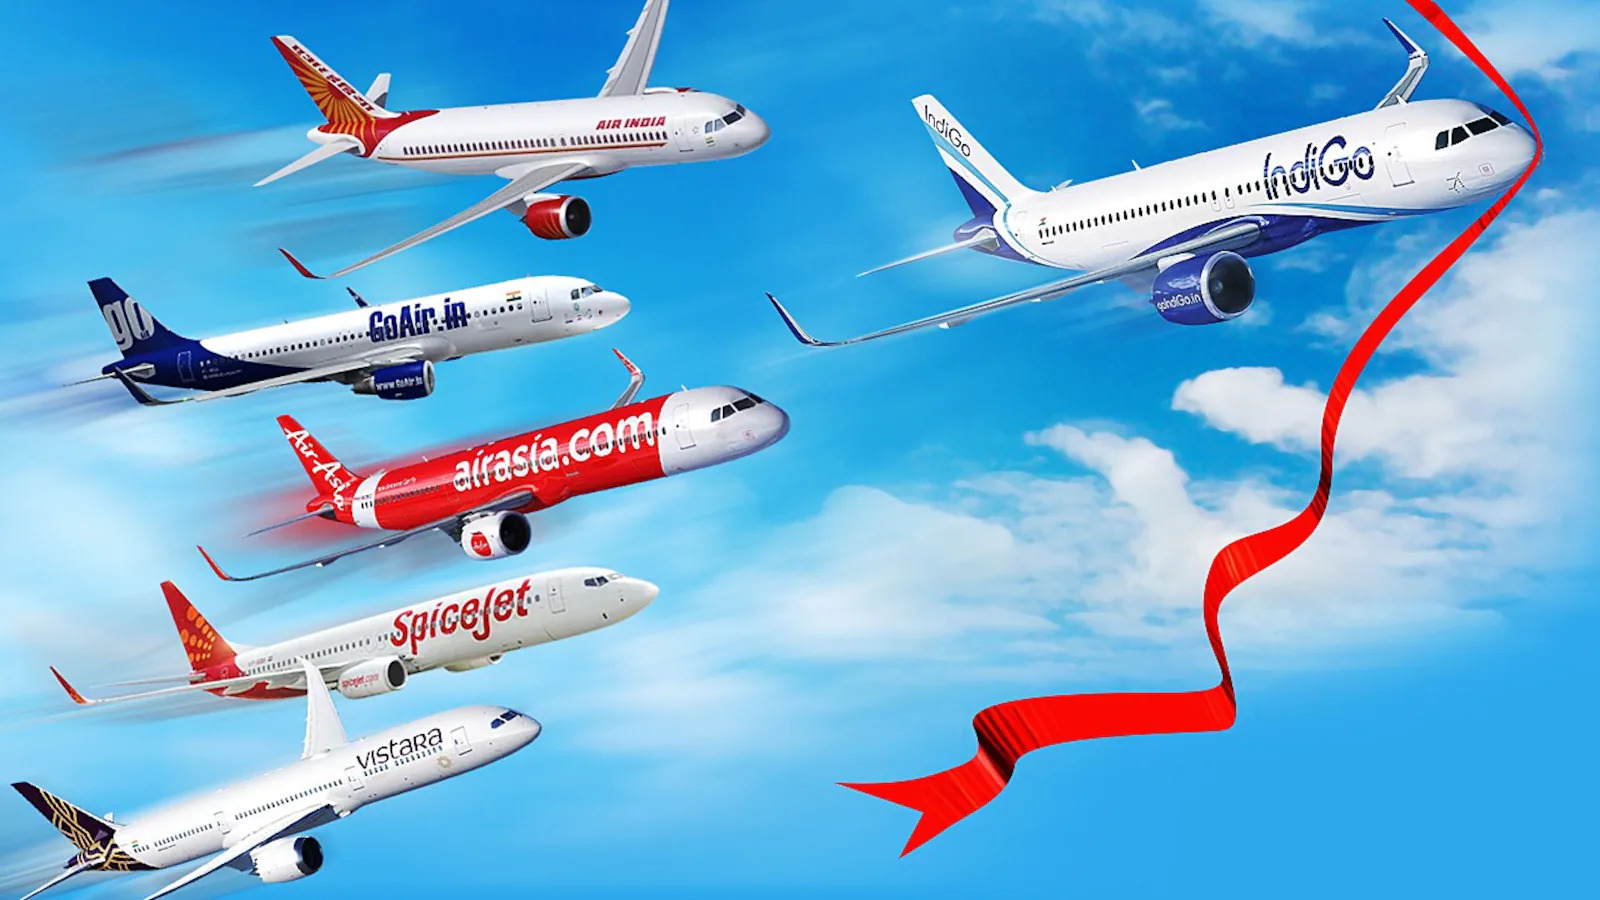

In this Exploratory Data Analysis, we will:

+ Clean the dataset by dropping null values and duplicates.
+ Further preprocess the data by removing unwanted features. 
+ Find distributions of different variables in the dataset.
+ Find the corelation of different features with the target variable("Fare").
+ Look at how fares have changed over time and try to find the reason behind it.
+ Analyze ticket prices with respect to different airlines and number of stops.


In [5]:
# Importing all necessary libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
df = pd.read_csv(r"C:\Users\azark\Desktop\Data Science\DataSets\flights.csv")

Lets have a glimpse at the dataset

In [9]:
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [10]:
df.shape

(452088, 13)

The dataset is quite big. Lets look at the datatypes and do some further digging. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


In [12]:
df.describe()

,Duration_in_hours,Days_left,Fare
count,452088.000000,452088.000000,452088.000000
mean,12.349222,25.627902,22840.100890
std,7.431478,14.300846,20307.963002
min,0.750000,1.000000,1307.000000
25%,6.583300,13.000000,8762.750000
50%,11.333300,26.000000,13407.000000
75%,16.500000,38.000000,35587.000000
max,43.583300,50.000000,143019.000000


In [13]:
df.isnull().sum()

Date_of_journey      0
Journey_day          0
Airline              0
Flight_code          0
Class                0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
dtype: int64

Surprisingly, there are not duplicates in the dataset.

But, there can be duplicates ...

In [14]:
df.duplicated().sum()

6722

In [15]:
# Dropping all the duplicates and keeping the last entry only. Duplicates are less than 2 percent of the whole dataset. 
df.drop_duplicates(keep='last',ignore_index=True ,inplace=True)

In [16]:
print("Airlines:", end=" ")
print(df.Airline.unique(), "\n")
print("Seat Classes:", end=" ")
print(df.Class.unique())
print("Departure Airports:",end=" ")
print(sorted(df.Source.unique()))
print("Destination Airports:",end=" ")
print(sorted(df.Destination.unique()))
print("Total Stops:", end=" ")
print(sorted(df["Total_stops"].unique()))

Airlines: ['SpiceJet' 'Indigo' 'GO FIRST' 'Air India' 'AirAsia' 'Vistara' 'AkasaAir'
 'AllianceAir' 'StarAir'] 

Seat Classes: ['Economy' 'Premium Economy' 'Business' 'First']
Departure Airports: ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai']
Destination Airports: ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai']
Total Stops: ['1-stop', '2+-stop', 'non-stop']


In [17]:
df.Class.value_counts()

Economy            248323
Business           126535
Premium Economy     70364
First                 144
Name: Class, dtype: int64

In [18]:
df=df[df.Class!="First"].reset_index()

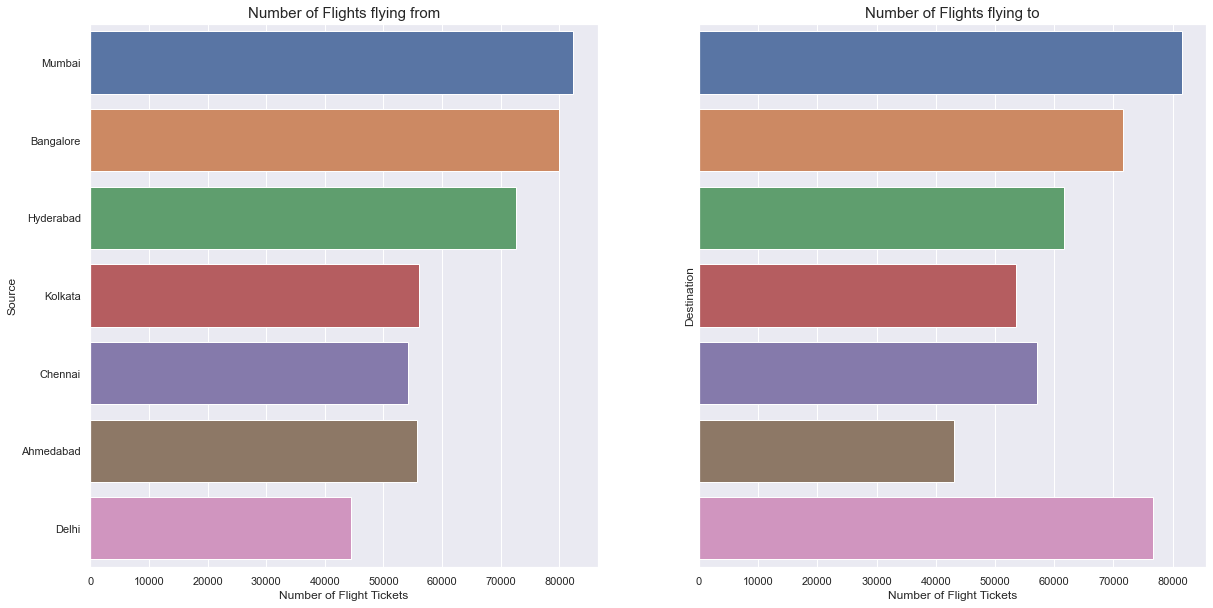

In [19]:
# Lets first find the number of flights flying from and to each airport
sns.set(style='darkgrid')
fig,axs = plt.subplots(1,2, figsize=(20,10),sharey=True)
sns.countplot(data=df,y="Source",ax=axs[0])
sns.countplot(data=df,y="Destination",ax=axs[1])
for ax in axs:
    ax.set_xlabel('Number of Flight Tickets')
axs[0].set_title("Number of Flights flying from",size=15)
axs[1].set_title("Number of Flights flying to",size=15)
plt.show()

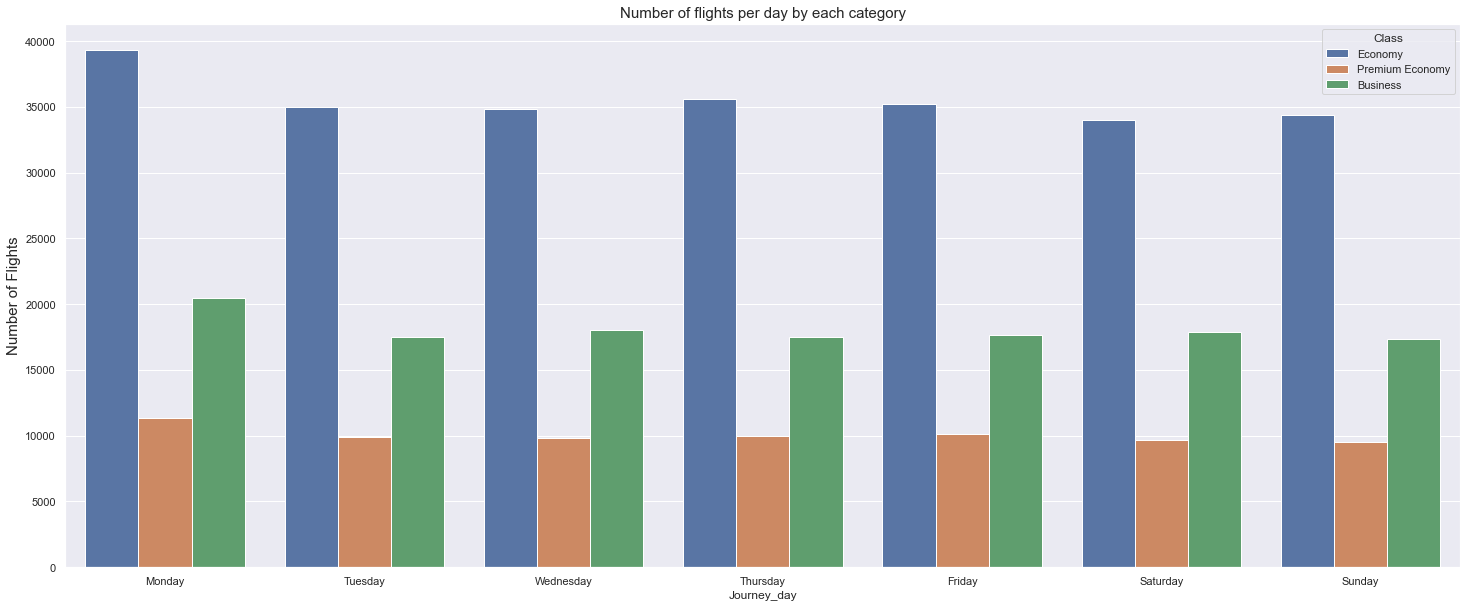

In [20]:
plt.figure(figsize=(25,10))
sns.countplot(x=df.Journey_day,hue=df.Class)
plt.ylabel("Number of Flights",size=15)
plt.title("Number of flights per day by each category",size=15)
plt.show()

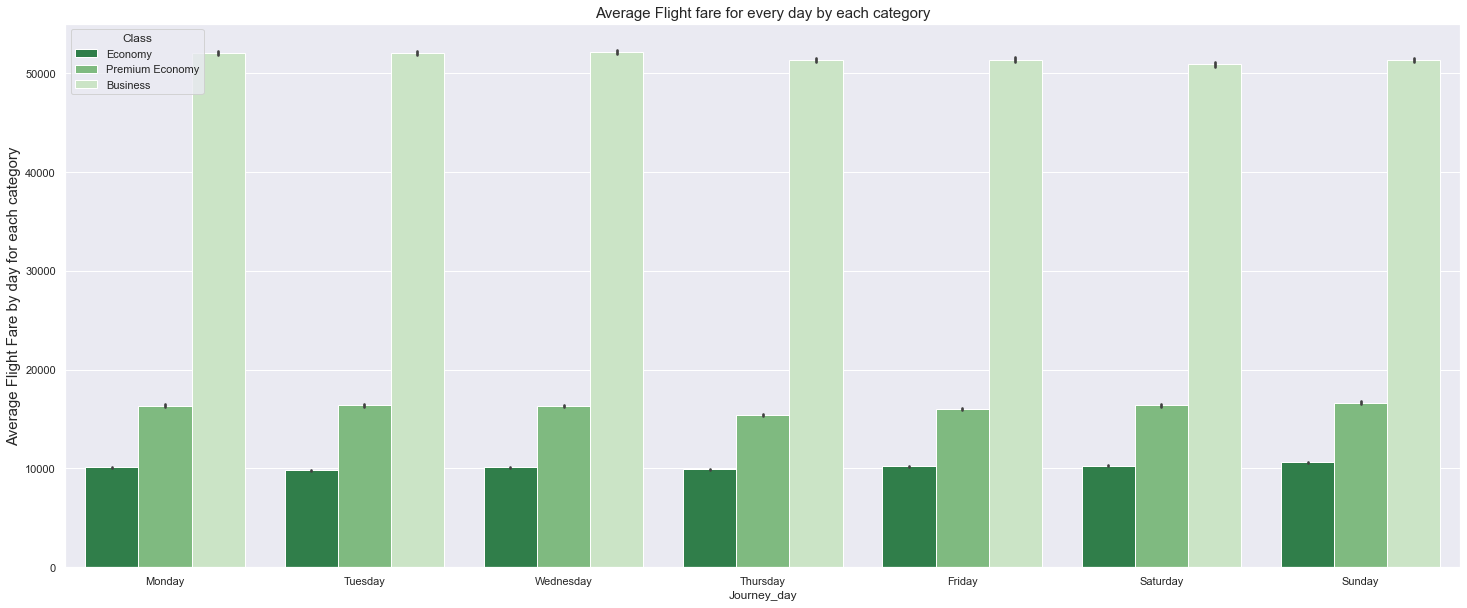

In [21]:
plt.figure(figsize=(25,10))
sns.barplot(x=df.Journey_day,y=df.Fare,hue=df.Class,palette="Greens_r")
plt.ylabel("Average Flight Fare by day for each category",size=15)
plt.title("Average Flight fare for every day by each category",size=15)
plt.show()

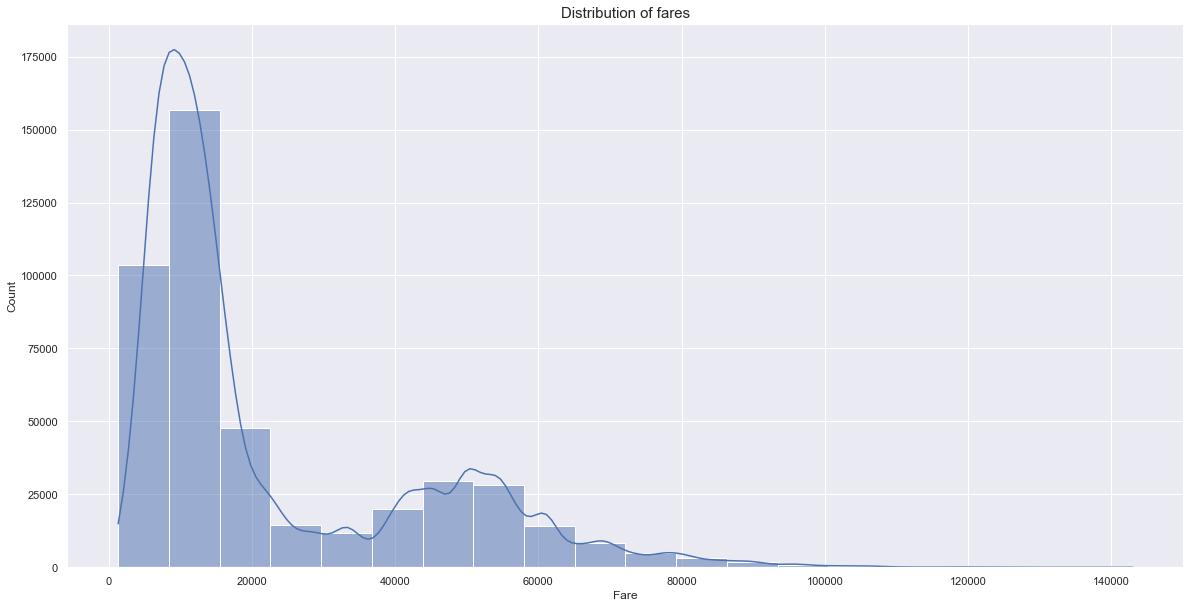

In [22]:
plt.figure(figsize=(20,10))
sns.histplot(df.Fare,kde=True,bins=20)
plt.title("Distribution of fares",size=15)
plt.show()

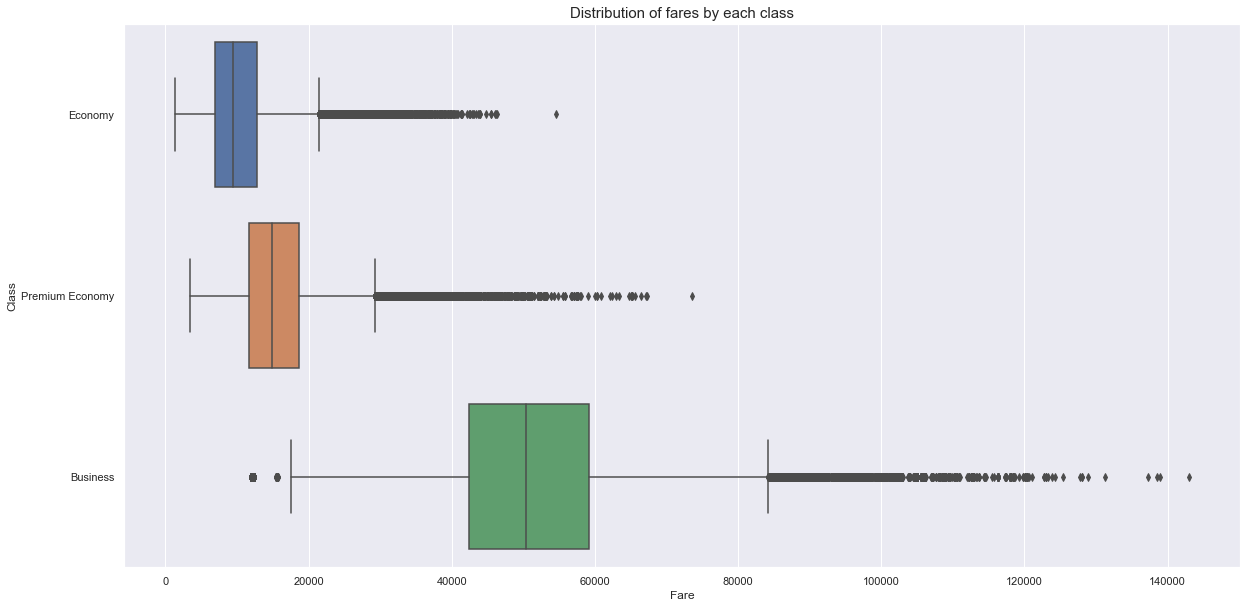

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.Fare,y=df.Class)
plt.title("Distribution of fares by each class",size=15)
plt.show()

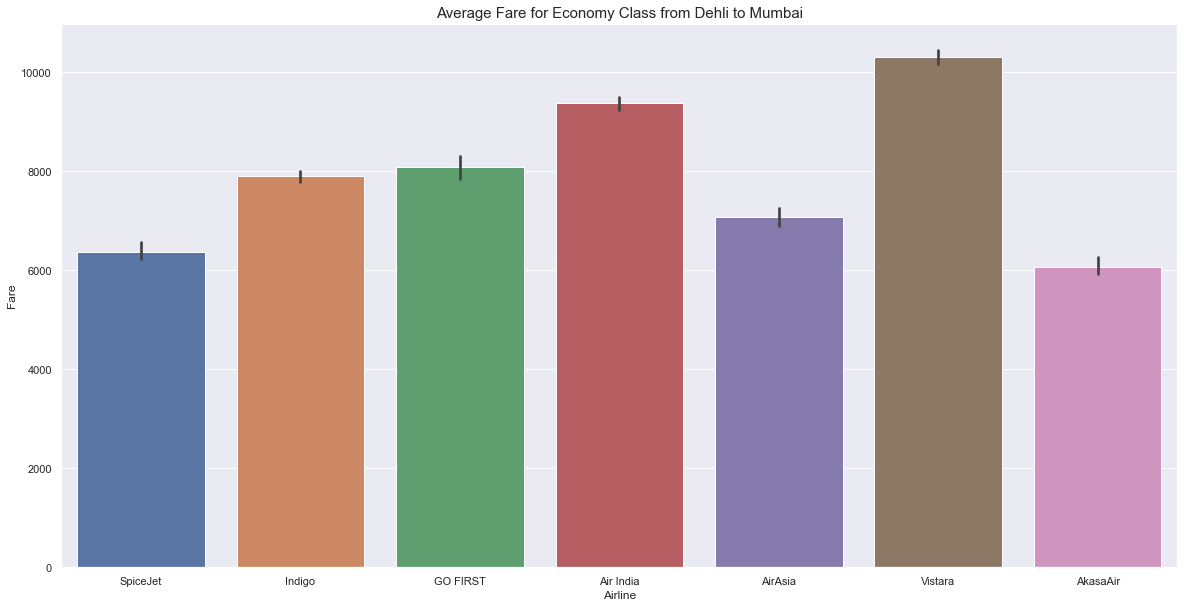

In [24]:
# From dehli to mumbai, lets see which airline has the cheapest economy class
plt.figure(figsize=(20,10))
sns.barplot(data=df[(df.Source == "Delhi") & (df["Class"] == "Economy") & (df.Destination == "Mumbai")],x="Airline",y="Fare")
plt.title("Average Fare for Economy Class from Dehli to Mumbai", size=15)
plt.show()

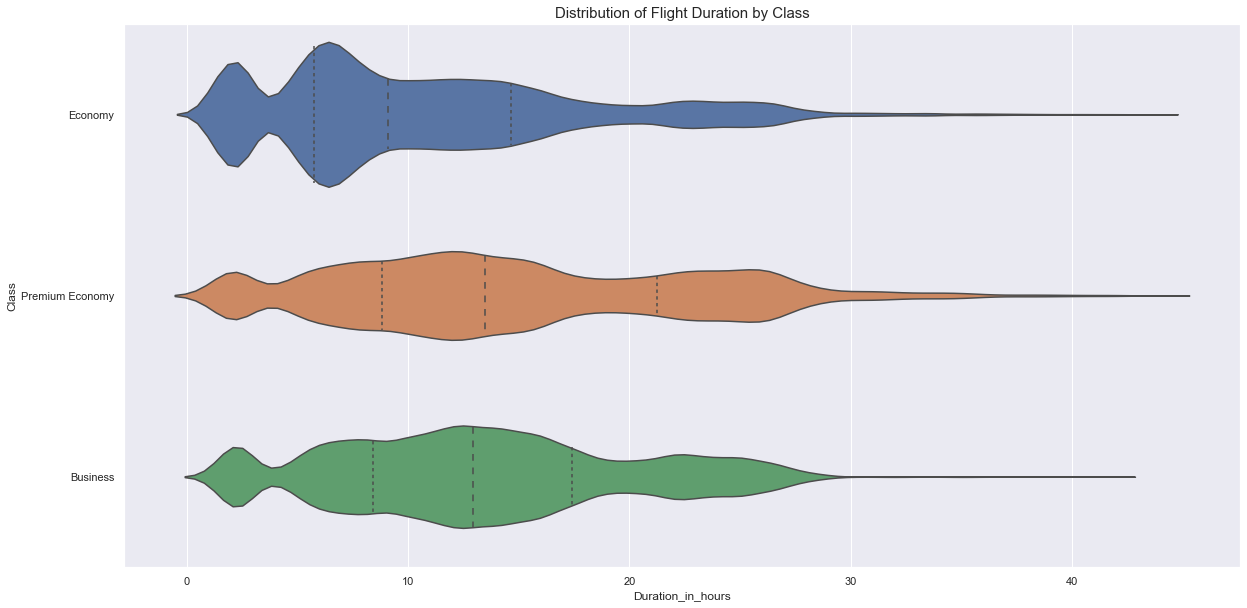

In [25]:
# Lets find out average flight hours for each category 
plt.figure(figsize=(20,10))
sns.violinplot(data=df, y="Class", x="Duration_in_hours",inner="quartile")
plt.title("Distribution of Flight Duration by Class",size=15)
plt.show()

Below is the average flight duration for non stops flights between each city. 

In [26]:
durations = df[df.Total_stops=="non-stop"].groupby(["Source","Destination"]).mean()["Duration_in_hours"]
durations

Source     Destination
Ahmedabad  Bangalore      2.177954
           Chennai        2.389990
           Delhi          1.550684
           Hyderabad      1.793842
           Kolkata        2.416660
           Mumbai         1.307204
Bangalore  Ahmedabad      2.273115
           Chennai        1.074526
           Delhi          2.808003
           Hyderabad      1.316050
           Kolkata        2.534974
           Mumbai         1.825508
Chennai    Ahmedabad      2.388222
           Bangalore      1.019003
           Delhi          2.833680
           Hyderabad      1.316782
           Kolkata        2.315756
           Mumbai         2.029955
Delhi      Ahmedabad      1.653036
           Bangalore      2.828462
           Chennai        2.831671
           Hyderabad      2.214573
           Kolkata        2.122704
           Mumbai         2.241987
Hyderabad  Ahmedabad      1.793779
           Bangalore      1.293318
           Chennai        1.419788
           Delhi          2.3678

In [27]:
print(f"On Average, the longest non-stop flights {round(durations.max(),2)} hours are from {durations.idxmax()[0]} to {durations.idxmax()[1]}.")
print(f"On Average, the shortest non-stop flights {round(durations.min(),2)} hours are from {durations.idxmin()[0]} to {durations.idxmin()[1]}.")

On Average, the longest non-stop flights 2.97 hours are from Kolkata to Mumbai.
On Average, the shortest non-stop flights 1.02 hours are from Chennai to Bangalore.


Lets see the effect of stops on the Fare

In [28]:
stops=df.Total_stops.unique()
stops

array(['non-stop', '1-stop', '2+-stop'], dtype=object)

In [29]:
df.Total_stops = df.Total_stops.apply(lambda x: 'One Stop' if x=='1-stop' else 'Two+ Stops' if x=='2+-stop' else x)
stops=df.Total_stops.unique()
stops

array(['non-stop', 'One Stop', 'Two+ Stops'], dtype=object)

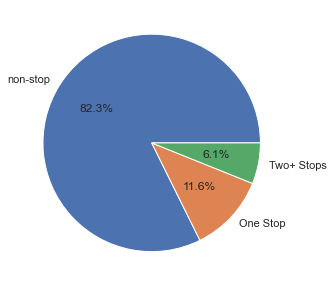

In [30]:
plt.figure(figsize=(5,5))
plt.pie(df.Total_stops.value_counts(),labels=stops,autopct='%1.1f%%')
plt.show()

+ Although the number of stops generally effect the fare price, it would not be the right approach to measure the average flight fare for these 3 different group as flight routes also effect fair price.
+ So, we compare the fare price for these three groups when the Source is constant.

In [31]:
df.groupby("Source").count()["Fare"].idxmax()

'Delhi'

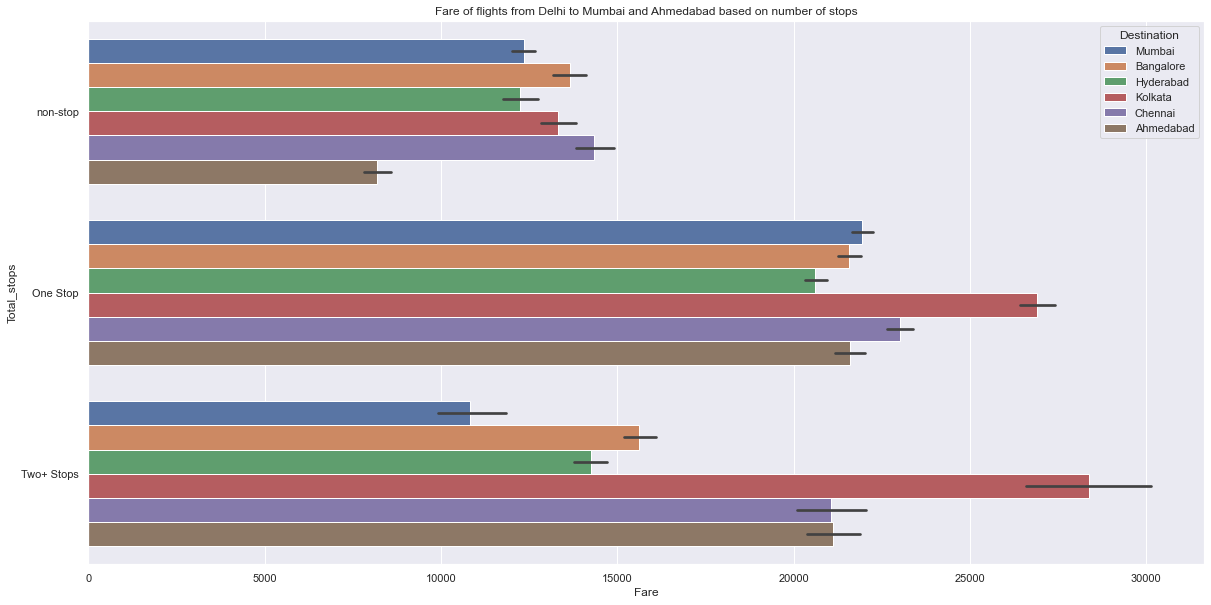

In [32]:
plt.figure(figsize=(20,10))

sns.barplot(data=df[(df.Source=="Delhi")], y="Total_stops",x="Fare", hue="Destination")
plt.title("Fare of flights from Delhi to Mumbai and Ahmedabad based on number of stops", size=12)
plt.show()

**+ Lets do some analysis with Date now!**




In [33]:
df['Date'] = pd.to_datetime(df['Date_of_journey'],format='%Y-%m-%d')

In [34]:
#Lets recheck the datatypes
df.dtypes

index                         int64
Date_of_journey              object
Journey_day                  object
Airline                      object
Flight_code                  object
Class                        object
Source                       object
Departure                    object
Total_stops                  object
Arrival                      object
Destination                  object
Duration_in_hours           float64
Days_left                     int64
Fare                          int64
Date                 datetime64[ns]
dtype: object

In [35]:
df.head()

,index,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Date
0,0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,2023-01-16
1,1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,2023-01-16
2,2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,2023-01-16
3,3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,2023-01-16
4,4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,2023-01-16


In [36]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [37]:
months = {
    1:"January",
    2:"Febuary",
    3:"March"
}
df.Month = df['Month'].map(months)

In [38]:
#df.Day.value_counts().sort_index()

In [39]:
df.Month.value_counts().sort_index()

Febuary    251524
January    140322
March       53376
Name: Month, dtype: int64











Inflation has been running high, how much has it impacted the ticket prices?  
# Lets see!

In [40]:
df.groupby(["Month","Day"]).mean()['Fare']

Month    Day
Febuary  1      23686.104615
         2      22745.917771
         3      22385.913434
         4      23411.862402
         5      22702.401718
         6      22459.680352
         7      22582.184862
         8      22579.769990
         9      21067.204287
         10     22402.819897
         11     22760.791929
         12     21788.410130
         13     21743.247526
         14     21070.210740
         15     21925.229996
         16     21196.501600
         17     21128.384014
         18     21577.993174
         19     21774.829078
         20     20950.988216
         21     21026.632100
         22     21591.222716
         23     21697.195581
         24     21445.196736
         25     21694.468220
         26     20919.548044
         27     21392.506533
         28     21097.963990
January  16     28785.931499
         17     26122.615155
         18     26640.553001
         19     25032.776734
         20     27016.485981
         21     26269.278851
 

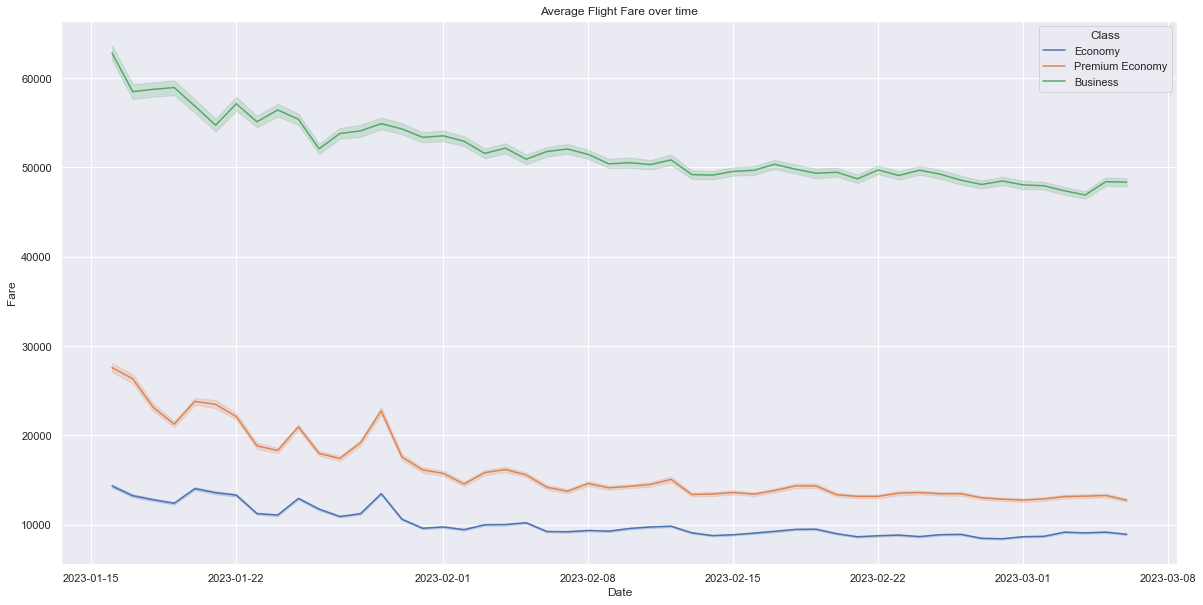

In [41]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x="Date",y="Fare",hue="Class")
plt.title("Average Flight Fare over time")
plt.show()

#Its the Opposite!!!

+ One reason can be the seasonal adjustment
+ People travel a lot during winter vactions and then return home in late Janauray which causes high demand. 


+ Looking at this, one thought arises, maybe people are are travelling shortes distances recently, that's why the costs fares are low.
+ Well, how about we see the average duartion_per_dollar for all non-stop flights over time?

In [42]:
df['Duration_in_minutes'] = df['Duration_in_hours'] * 60
df['cost_per_minute'] = df['Fare']/df['Duration_in_minutes']

In [43]:
df.head()

,index,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Date,Month,Day,Duration_in_minutes,cost_per_minute
0,0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,2023-01-16,January,16,124.998,42.680683
1,1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,2023-01-16,January,16,139.998,42.136316
2,2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,2023-01-16,January,16,130.002,44.622390
3,3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,2023-01-16,January,16,124.998,46.352742
4,4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,2023-01-16,January,16,130.002,45.806988


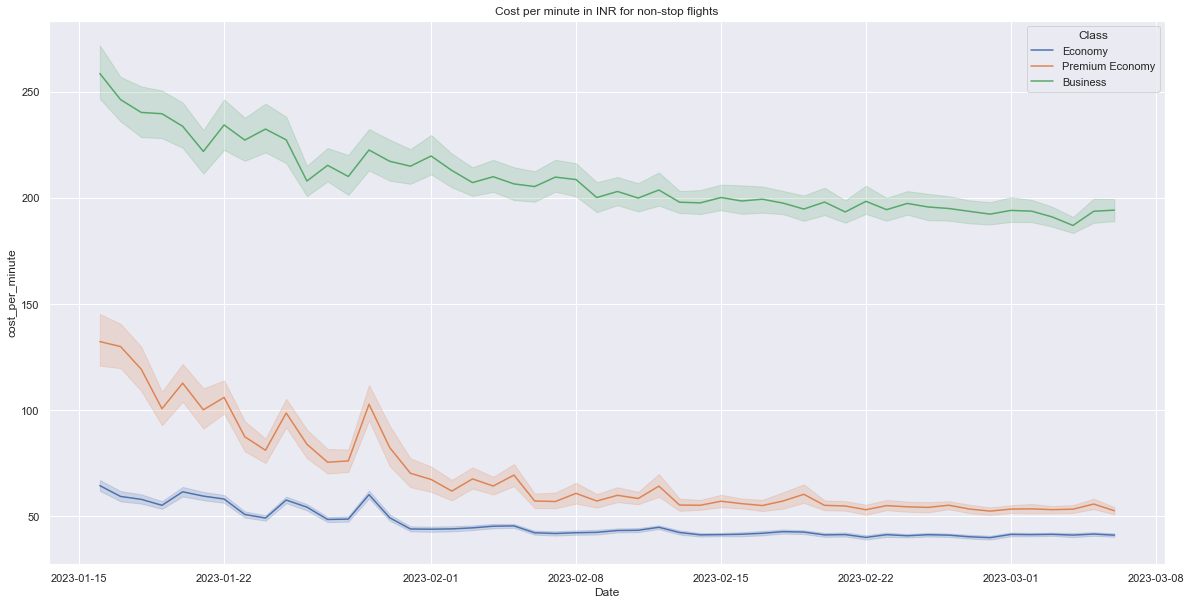

In [44]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df[df.Total_stops=="non-stop"], x = "Date", y =  "cost_per_minute",hue="Class")
plt.title("Cost per minute in INR for non-stop flights")
plt.show()

Well, it seems like tickets prices have really gone down. 

How about we compare the cost per minute of each airline?

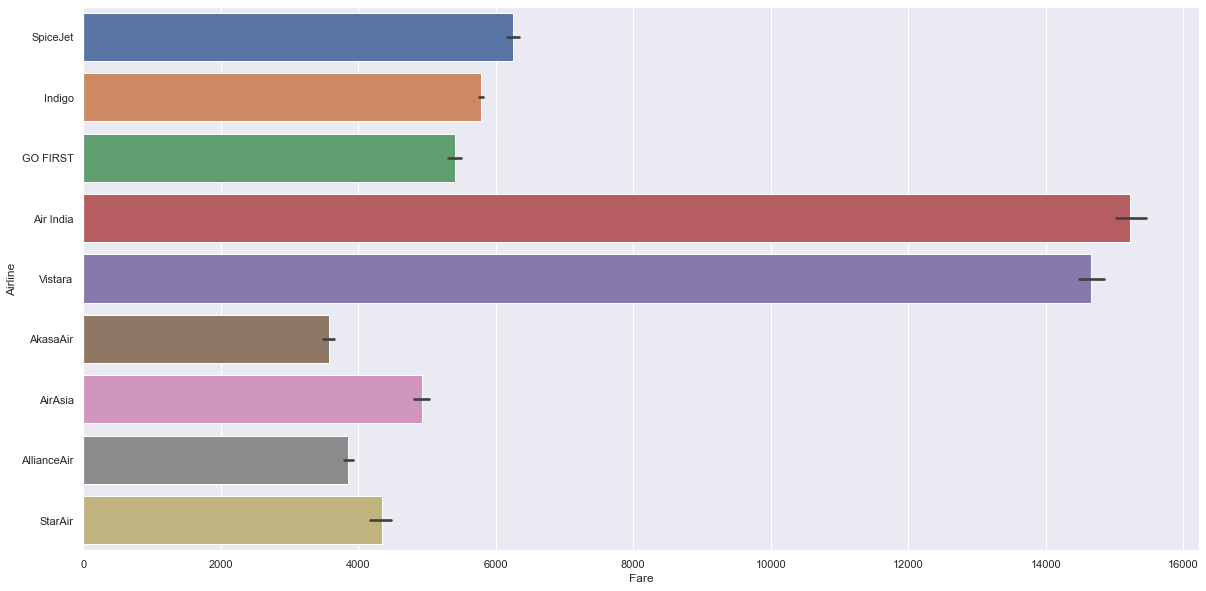

In [45]:
plt.figure(figsize=(20,10))
sns.barplot(data=df[df.Total_stops=='non-stop'],y="Airline",x="Fare")
plt.show()

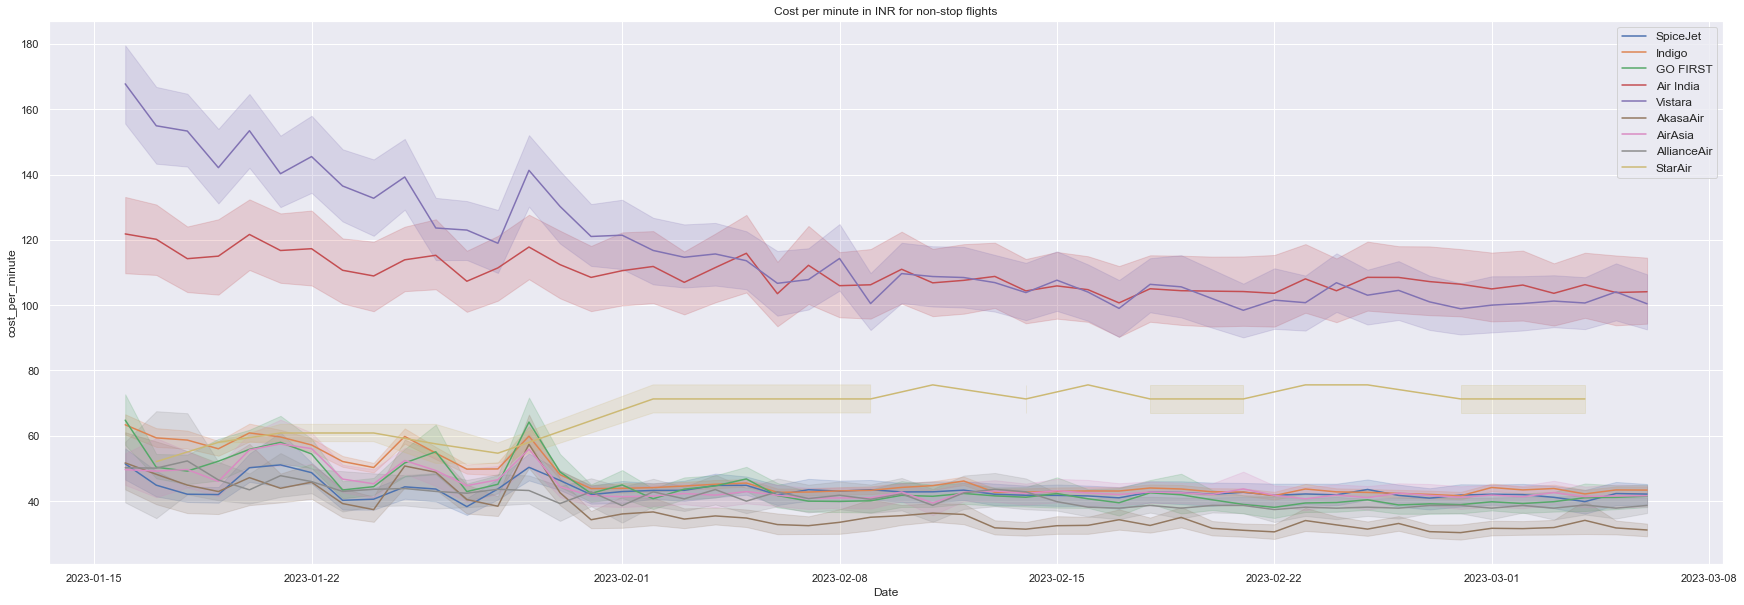

In [46]:
plt.figure(figsize=(30,10))
sns.lineplot(data=df[df.Total_stops=="non-stop"], x = "Date", y =  "cost_per_minute",hue="Airline")
plt.title("Cost per minute in INR for non-stop flights")
plt.legend(loc = 'upper right',fontsize=12)
plt.show()

In [47]:
df.Airline.value_counts()

Vistara        226204
Air India      118261
Indigo          65659
AirAsia         15764
GO FIRST        10786
SpiceJet         5863
AkasaAir         2230
AllianceAir       393
StarAir            62
Name: Airline, dtype: int64

In [48]:
plt.figure(figsize=(20,10))
airline_ranking = data=df[df.Total_stops=='non-stop'].groupby("Airline").mean()["cost_per_minute"].reset_index()
airline_ranking
#sns.barplot(data=df[df.Total_stops=='non-stop'],y="Airline",x="cost_per_minute")
#plt.show()

,Airline,cost_per_minute
0,Air India,109.105888
1,AirAsia,44.372191
2,AkasaAir,36.802910
3,AllianceAir,41.274292
4,GO FIRST,44.458098
5,Indigo,47.116124
6,SpiceJet,43.169021
7,StarAir,67.533175
8,Vistara,116.248292


<Figure size 1440x720 with 0 Axes>

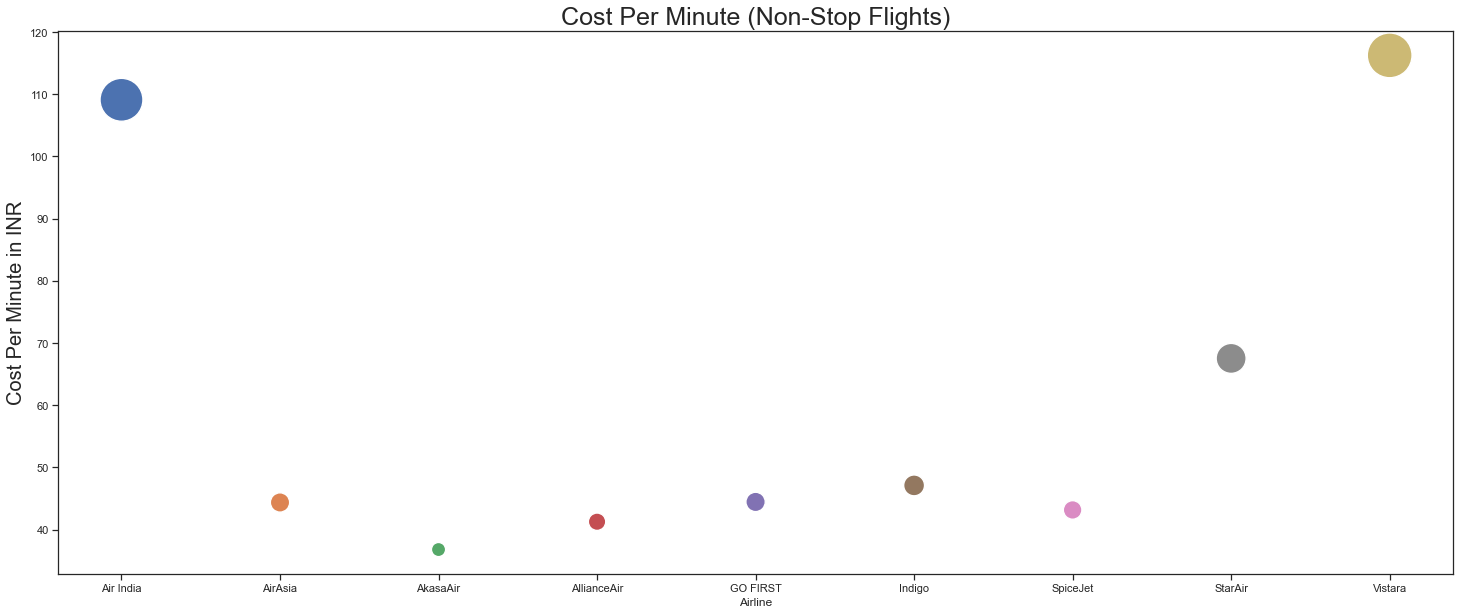

In [49]:
sns.set_style("ticks")

plt.figure(figsize=(25,10))
scatter_plot = sns.scatterplot(data=airline_ranking, x="Airline", y="cost_per_minute", hue="Airline", size="cost_per_minute",marker='o',s=1000,sizes=(200,2000),legend=False)

plt.ylabel("Cost Per Minute in INR", size=20)

plt.title("Cost Per Minute (Non-Stop Flights)",size=25)
plt.show()

Lets Conclude the EDA with a simple pairplot! 

Text(0.5, 1.0, 'Pair plot')

<Figure size 1440x720 with 0 Axes>

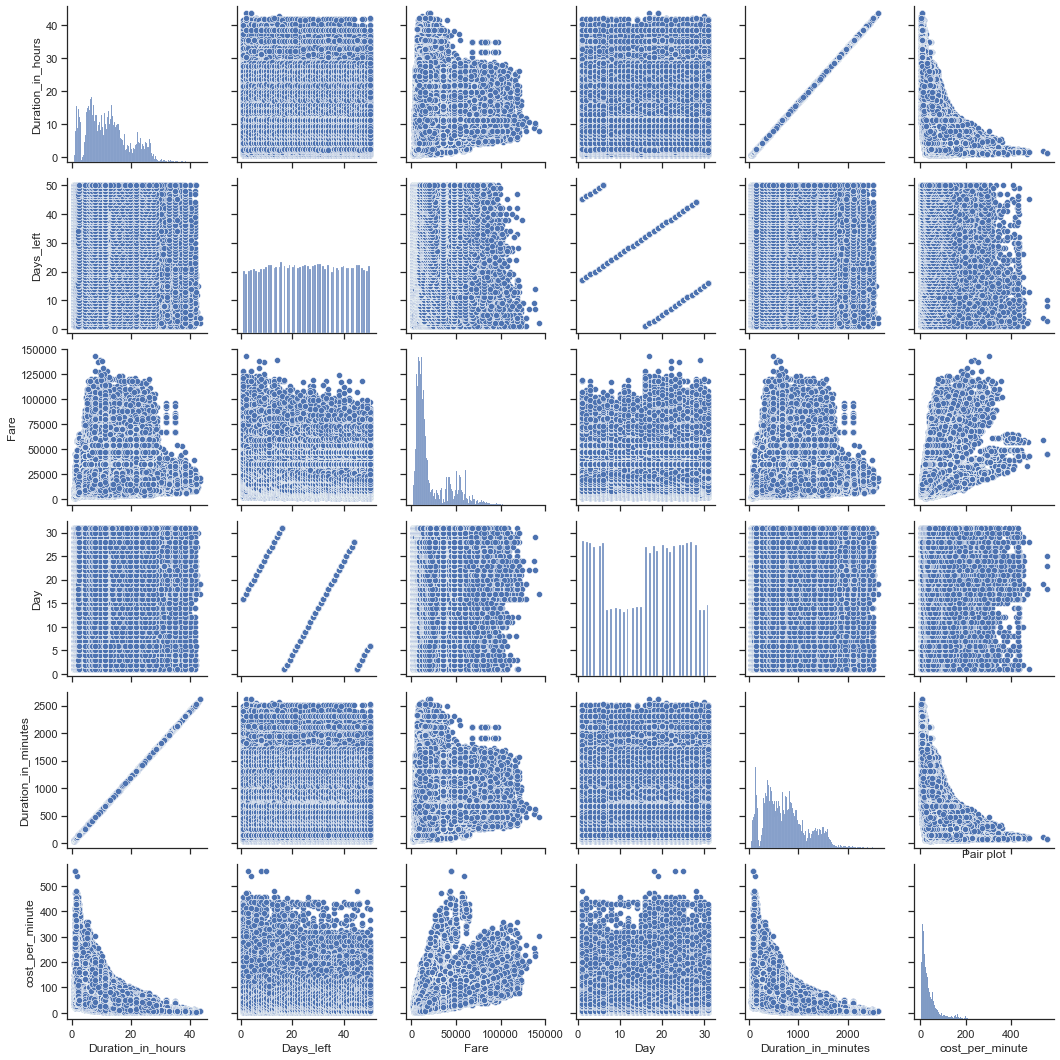

In [50]:
df.drop("index",axis=1,inplace=True)
plt.figure(figsize=(20,10))
sns.pairplot(df)
plt.title("Pair plot")

# Conclusion

+ The dataset includes 7 cities of India.
+ Prices do differ substantially for each airline. We determined this from cost per minute. 
+ Number of Flights and the ticket prices are not effected by the day. In other words, they remain same on weekdays as on weekends.
+ For every source and destination pair, the number of stops does effect the fare price with one-stop being the most expensive generally. 
+ Tickets prices have generally gone down over these 3 months, alought we do not have enough data for the month of March. 
+ We did not use the feature "Days left" since I did not understand what it means. Maybe, they scraped it before these flights were scheduled and this column means the number of days left for the flight. 

In [51]:
print(f"arrival: {df.Arrival.value_counts()} /n Departure: {df.Departure.value_counts()}")

arrival: After 6 PM      196828
6 AM - 12 PM    117665
12 PM - 6 PM    100322
Before 6 AM      30407
Name: Arrival, dtype: int64 /n Departure: 6 AM - 12 PM    181019
After 6 PM      126655
12 PM - 6 PM    114693
Before 6 AM      22855
Name: Departure, dtype: int64
